In [30]:
import jax.numpy as jnp
from jax import random, grad, jit, jacfwd, jacrev, vmap
from jax.scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Using JAX to solve common microeconomic optimization problems 

### Problem 1

Suppose the temperature (𝑇) in a refining tower after 𝑋 hours is defined by:

$$T = x^4  - 4x + 112$$

Optimize this function. Is the resulting critical point a maximum or a minimum? What is the associated temperature?

In [4]:
def temp(x):
    return jnp.sum(x**4 - 4*x + 112)

In [22]:
# Different values of x will create different outcomes
x = jnp.arange(10.)

# Obtain gradient
gradient = grad(temp)

# Outputs of gradient evaluated at different values of x
ans = gradient(x)

# Index where the critical value occurs
idx = jnp.where(ans == 0)
critical_value = x[idx]

print('Critical Value                  = ', critical_value[0])
print('Evaluate function at this value = ', temp(critical_value[0]))

Critical Value                  =  1.0
Evaluate function at this value =  109.0


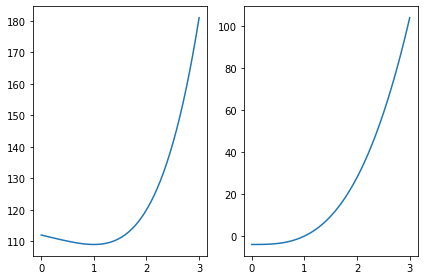

In [35]:
x = np.linspace(0, 3)
tempFunction = x**4 - 4*x + 112

fig, (ax1, ax2) = plt.subplots(ncols=2)
sns.lineplot(x=x, y=tempFunction, ax=ax1)
sns.lineplot(x=x, y=vmap(lambda x: gradient(x))(x))
plt.tight_layout()
plt.show()

### Problem 2

Suppose a company has the following total cost function:

$$TC = 20 + 3x + 54x^{-1/2}$$

Where $TC$ represents total cost (in $) and $x$ is the quantity of production

The tasks are the following: 

1.) Derive total cost function

2.) Use JAX autodiff. to compute the marginal cost

3.) Evaluate outcomes at different levels of quantity "x"

4.) Determine which quantity value results in the lowest total cost (minimization)

In [36]:
# Assume the following total cost function
def total_cost(x):
    return jnp.sum(20 + 3*x + 54*x**-.50)

In [37]:
# Derivative of total cost function represents the marginal cost
marginal_cost = grad(total_cost)

In [47]:
# Solve for the quantity "x" that minimizes total cost
quantity = jnp.arange(20.)

# Critical value
outcomes = marginal_cost(quantity)
idx = jnp.where(outcomes == 2)
critical_value = quantity[idx]

print('Total Cost = ', total_cost(critical_value[0]))

Total Cost =  65.0
